# Final project intro data science.

## importing and data fixed

### import all packages

In [714]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import numpy as np
import plotly.graph_objects as go

### import data

In [656]:
df = pd.read_csv("C:\\Users\\brhva\\Downloads\\archive\\df_file.csv")
df.head(100)

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0
...,...,...
95,Pre-poll clash on tax and spend\n \n Labour an...,0
96,Labour's election love-in\n \n Peace and love ...,0
97,Tories unveil quango blitz plans\n \n Plans to...,0
98,Tory leader urges Harry apology\n \n Prince Ha...,0


### print data shape

In [657]:
df.shape

(2225, 2)

### display nulls data

In [658]:
df.isnull().sum()

Text     0
Label    0
dtype: int64

### display data information

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


### display class to predict data

In [660]:
df["Label"].value_counts()

Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

In [661]:
#TODO convert the data from numbers to names.

### display diagram of the classes

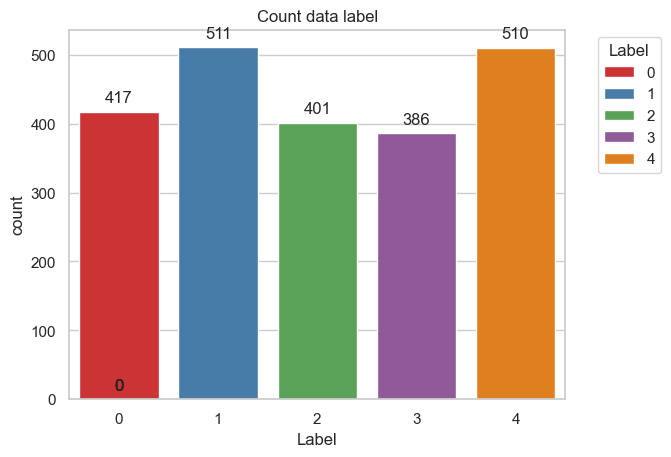

In [709]:
# Assuming df is your DataFrame with the "Label" column
sns.set(style="whitegrid")
ax = sns.countplot(x="Label", hue="Label", palette="Set1", data=df)

# Move legend outside the plot to the right
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a legend above all columns with the amount as integers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Count data label")
plt.show()

### split data to train and test

random state = the same random split every code run.

In [699]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42) 


In [664]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (1780,)
X_test.shape: (445,)
y_train.shape: (1780,)
y_test.shape: (445,)


### Check labels spread between Train and Test

In [666]:
y_train.value_counts()

Label
1    413
4    408
0    325
2    324
3    310
Name: count, dtype: int64

In [711]:
y_test.value_counts()

Label
4    102
1     98
0     92
2     77
3     76
Name: count, dtype: int64

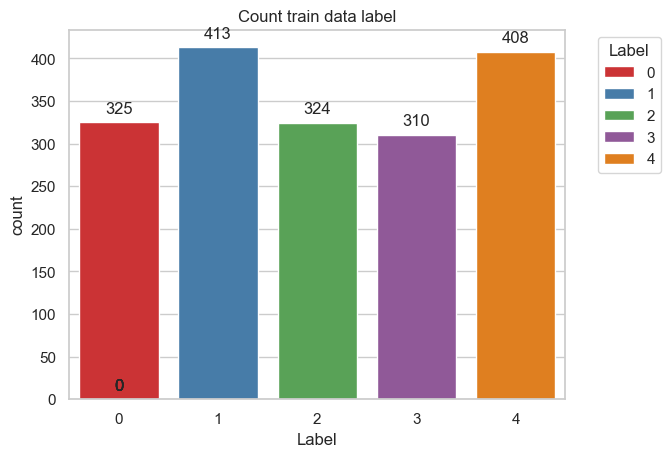

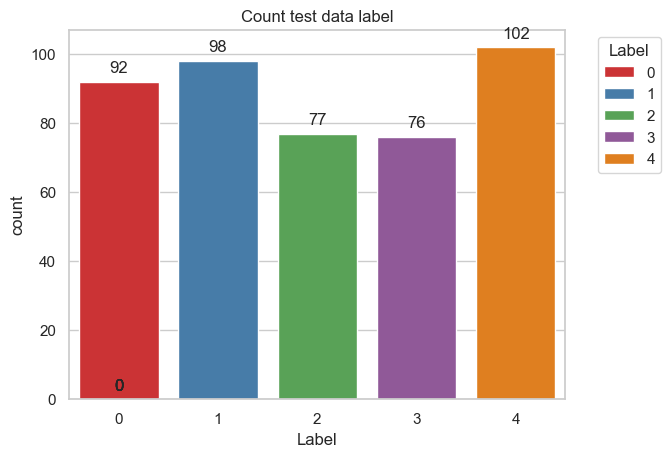

In [710]:
# Create separate DataFrames for visualization
df_train = pd.DataFrame({'Text': X_train, 'Label': y_train})
df_test = pd.DataFrame({'Text': X_test, 'Label': y_test})

# Plot for y_train
sns.set(style="whitegrid")
ax_train = sns.countplot(x="Label", hue="Label", palette="Set1", data=df_train)

# Move legend outside the plot to the right
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a legend above all columns with the amount as integers for y_train
for p in ax_train.patches:
    ax_train.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Count train data label")
plt.show()

# Plot for y_test
sns.set(style="whitegrid")
ax_test = sns.countplot(x="Label", hue="Label", palette="Set1", data=df_test)

# Move legend outside the plot to the right
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a legend above all columns with the amount as integers for y_test
for p in ax_test.patches:
    ax_test.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Count test data label")
plt.show()

### convert data to vectorized space

In [712]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)# You can adjust max_features based on your dataset
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Display PCA of vectorized

0


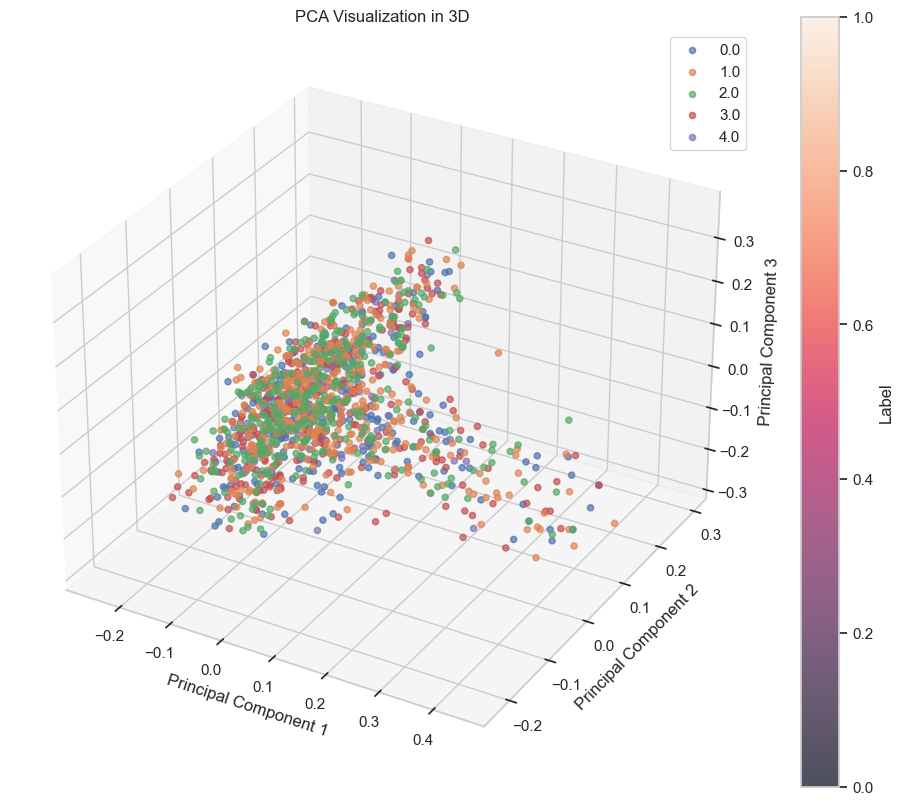

In [718]:
dense_array = X_train_tfidf.toarray()
pca = PCA(n_components=3)
pca_result = pca.fit_transform(dense_array)
ds = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
ds['Label'] = y_train.dropna()

# Handling NaN values
ds = ds.dropna()

# Check for NaN values in the 'Label' column
print(ds['Label'].isnull().sum())

# Plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = None
for group in ds['Label'].unique():
    group_data = ds[ds['Label'] == group]
    scatter = ax.scatter(group_data['PC1'], group_data['PC2'], group_data['PC3'], label=group, alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization in 3D')
cbar = fig.colorbar(scatter)
cbar.set_label('Label')
ax.legend()

plt.show()

### Display Dimensions of X train vectorized

In [669]:
print("Dimensions of X_train_tfidf:", X_train_tfidf.shape)
print("Number of samples in y_train:", len(y_train))

Dimensions of X_train_tfidf: (1780, 5000)
Number of samples in y_train: 1780


# KNN classifier algorithm

### define which K nearest neighbors is best 

In [719]:
knn_numbers = [3,5,7,9,11,13,15,17,19,21,23,24]
new_df = pd.DataFrame({'n_neighbors':[],'p':[], 'train_accuracy':[], 'test_accuracy':[]})

best_accuracy = 0.0
best_k = None
accuracies = []

for k in knn_numbers:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'KNN with k={k} - Accuracy: {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
print(f'Best Accuracy: {best_accuracy} achieved with k={best_k}')

KNN with k=3 - Accuracy: 0.9235955056179775
KNN with k=5 - Accuracy: 0.9370786516853933
KNN with k=7 - Accuracy: 0.9415730337078652
KNN with k=9 - Accuracy: 0.9370786516853933
KNN with k=11 - Accuracy: 0.9303370786516854
KNN with k=13 - Accuracy: 0.9280898876404494
KNN with k=15 - Accuracy: 0.9325842696629213
KNN with k=17 - Accuracy: 0.9280898876404494
KNN with k=19 - Accuracy: 0.9325842696629213
KNN with k=21 - Accuracy: 0.9303370786516854
KNN with k=23 - Accuracy: 0.9280898876404494
KNN with k=24 - Accuracy: 0.9280898876404494
Best Accuracy: 0.9415730337078652 achieved with k=7


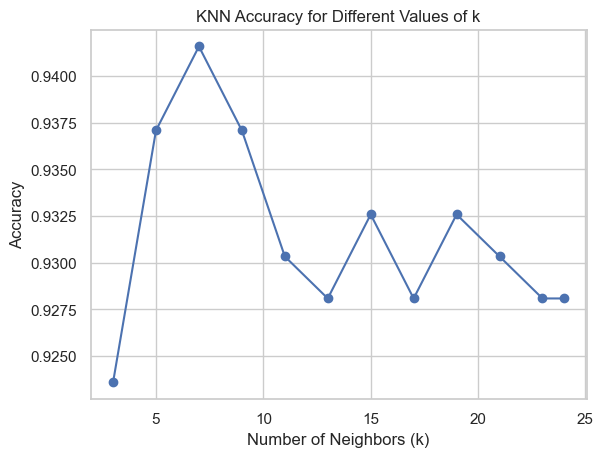

In [720]:
# Plotting the accuracy for each k
plt.plot(knn_numbers, accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

## start Knn algorithm

In [671]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

### enter vectorized data

In [672]:
knn_classifier.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=7)

In [673]:
y_train.value_counts()

Label
1    413
4    408
0    325
2    324
3    310
Name: count, dtype: int64

## Test on train data

### Predict on the train data

In [674]:
y_train_pred = knn_classifier.predict(X_train_tfidf)

### Calculate metrics on test on train data

In [675]:
accuracy0 = accuracy_score(y_train, y_train_pred)
precision0 = precision_score(y_train, y_train_pred, average='weighted')
recall0 = recall_score(y_train, y_train_pred, average='weighted')
f1_0 = f1_score(y_train, y_train_pred, average='weighted')
print("KNN Metrics Test On Train Data:")
print(f"Accuracy: {accuracy0}")
print(f"Precision: {precision0}")
print(f"Recall: {recall0}")
print(f"F1 Score: {f1_0}")

KNN Metrics Test On Train Data:
Accuracy: 0.9567415730337079
Precision: 0.9586657389790554
Recall: 0.9567415730337079
F1 Score: 0.9566747619398042


### print classification report on test on train data

In [676]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       325
           1       0.98      0.99      0.98       413
           2       0.93      0.98      0.95       324
           3       0.98      0.95      0.96       310
           4       0.99      0.89      0.94       408

    accuracy                           0.96      1780
   macro avg       0.96      0.96      0.96      1780
weighted avg       0.96      0.96      0.96      1780


In [698]:
# Create a classification report
report = classification_report(y_train, y_train_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Create a table
fig = go.Figure()

fig.add_trace(go.Table(
    header=dict(values=['Class', 'Precision', 'Recall', 'F1-Score', 'Support']),
    cells=dict(values=[df_report.index, df_report['precision'], df_report['recall'], df_report['f1-score'], df_report['support']])
))

# Update the layout for better readability
fig.update_layout(title='Classification Report')

# Show the plot
fig.show()

### Calculate confusion matrix on test on train data

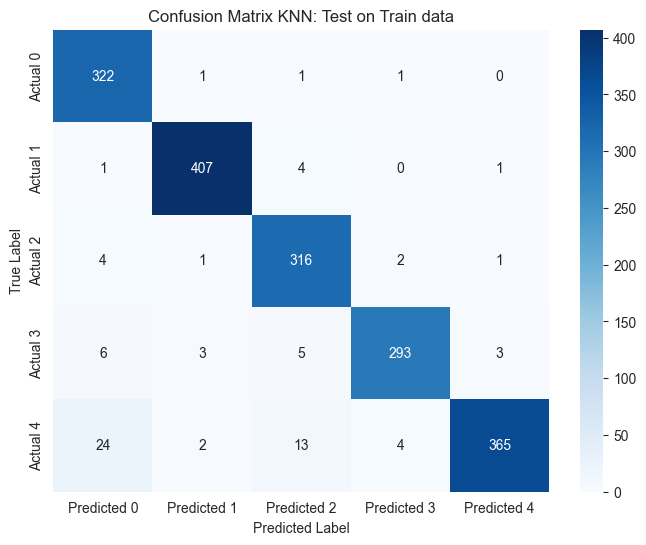

In [678]:
# Calculate confusion matrix
cm = confusion_matrix(y_train, y_train_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1','Actual 2','Actual 3', 'Actual 4' ])  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix KNN: Test on Train data')
plt.show()

## Test on test data

### Predict the test data

In [679]:
y_test_pred = knn_classifier.predict(X_test_tfidf)

### Calculate metrics on test on test data

In [680]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("KNN Metrics Test On Test Data:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

KNN Metrics Test On Test Data:
Accuracy: 0.9415730337078652
Precision: 0.944641965325075
Recall: 0.9415730337078652
F1 Score: 0.9419389118350044


### print classification report on test on test data


In [681]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        92
           1       1.00      0.96      0.98        98
           2       0.91      0.94      0.92        77
           3       0.92      0.96      0.94        76
           4       0.99      0.89      0.94       102

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg       0.94      0.94      0.94       445


In [682]:
# Create a classification report
report = classification_report(y_test, y_test_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Create a table
fig = go.Figure()

fig.add_trace(go.Table(
    header=dict(values=['Class', 'Precision', 'Recall', 'F1-Score', 'Support']),
    cells=dict(values=[df_report.index, df_report['precision'], df_report['recall'], df_report['f1-score'], df_report['support']])
))

# Update the layout for better readability
fig.update_layout(title='Classification Report')

# Show the plot
fig.show()

### Calculate confusion matrix on test on test data 

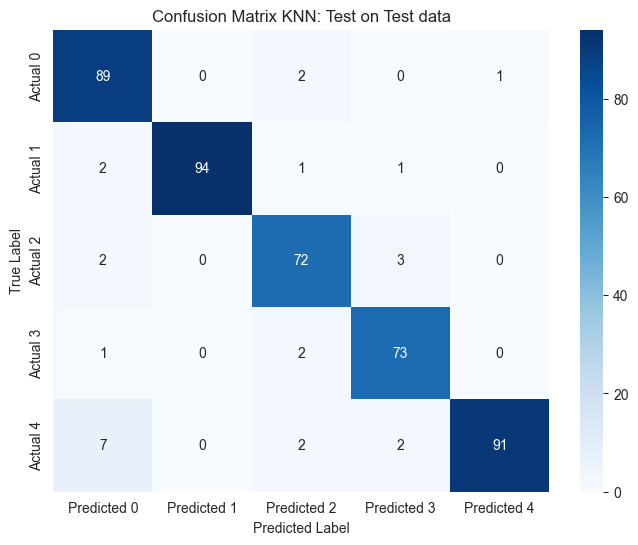

In [683]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1','Actual 2','Actual 3', 'Actual 4' ]) 
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix KNN: Test on Test data')
plt.show()

# Naive Bayes classifier algorithm

In [684]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

## Test on Train data

### Predict train data

In [685]:
y_NB_train_pred = model.predict(X_train_tfidf)

### Calculate metrics on test on test data

In [686]:
accuracy1 = accuracy_score(y_train, y_NB_train_pred)
precision1 = precision_score(y_train, y_NB_train_pred, average='weighted')
recall1 = recall_score(y_train, y_NB_train_pred, average='weighted')
f1_1 = f1_score(y_train, y_NB_train_pred, average='weighted')
print("Naive Bayes Metrics test On Train Data:")
print(f"Accuracy: {accuracy1}")
print(f"Precision: {precision1}")
print(f"Recall: {recall1}")
print(f"F1 Score: {f1_1}")

Naive Bayes Metrics test On Train Data:
Accuracy: 0.9870786516853932
Precision: 0.9871842863941463
Recall: 0.9870786516853932
F1 Score: 0.9870806982128506


### print classification report on test on train data

In [687]:
print(classification_report(y_train, y_NB_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       325
           1       1.00      1.00      1.00       413
           2       0.98      0.98      0.98       324
           3       1.00      0.97      0.99       310
           4       0.98      0.99      0.98       408

    accuracy                           0.99      1780
   macro avg       0.99      0.99      0.99      1780
weighted avg       0.99      0.99      0.99      1780


In [697]:
# Create a classification report
report = classification_report(y_train, y_NB_train_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Create a table
fig = go.Figure()

fig.add_trace(go.Table(
    header=dict(values=['Class', 'Precision', 'Recall', 'F1-Score', 'Support']),
    cells=dict(values=[df_report.index, df_report['precision'], df_report['recall'], df_report['f1-score'], df_report['support']])
))

# Update the layout for better readability
fig.update_layout(title='Classification Report')

# Show the plot
fig.show()

### Calculate confusion matrix on test on train data

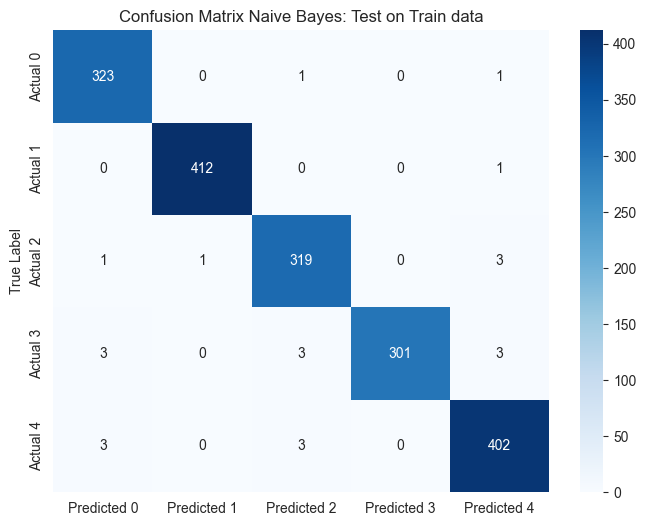

In [689]:
# Calculate confusion matrix
cm = confusion_matrix(y_train, y_NB_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1','Actual 2','Actual 3', 'Actual 4' ])
plt.ylabel('True Label')
plt.title('Confusion Matrix Naive Bayes: Test on Train data')
plt.show()

## Test on test data

### Predict the test data

In [690]:
y_NB_test_pred = model.predict(X_test_tfidf)

### Calculate metrics on test on test data

In [691]:
accuracy2 = accuracy_score(y_test, y_NB_test_pred)
precision2 = precision_score(y_test, y_NB_test_pred, average='weighted')
recall2 = recall_score(y_test, y_NB_test_pred, average='weighted')
f1_2 = f1_score(y_test, y_NB_test_pred, average='weighted')
print("Naive Bayes Metrics test On Test Data:")
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"F1 Score: {f1_2}")

Naive Bayes Metrics test On Test Data:
Accuracy: 0.9573033707865168
Precision: 0.9572515323134623
Recall: 0.9573033707865168
F1 Score: 0.9571657860924823


### print classification report on test on test data

In [692]:
print(classification_report(y_test, y_NB_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        92
           1       0.97      1.00      0.98        98
           2       0.95      0.92      0.93        77
           3       0.97      0.95      0.96        76
           4       0.95      0.96      0.96       102

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445


In [693]:
# Create a classification report
report = classification_report(y_test, y_NB_test_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Create a table
fig = go.Figure()

fig.add_trace(go.Table(
    header=dict(values=['Class', 'Precision', 'Recall', 'F1-Score', 'Support']),
    cells=dict(values=[df_report.index, df_report['precision'], df_report['recall'], df_report['f1-score'], df_report['support']])
))

# Update the layout for better readability
fig.update_layout(title='Classification Report')

# Show the plot
fig.show()

### Calculate confusion matrix on test on test data

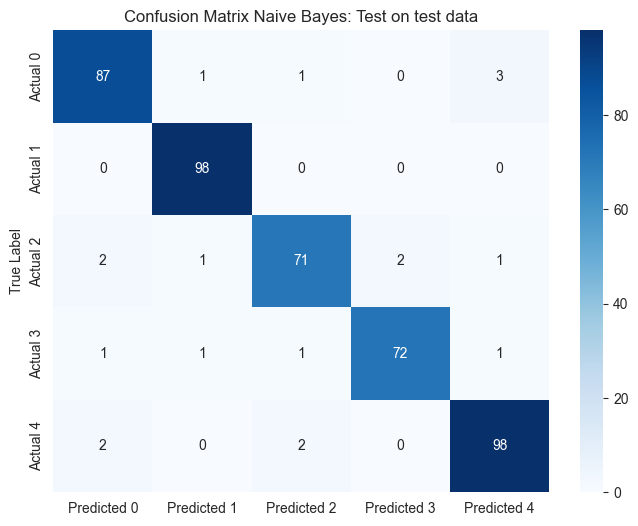

In [694]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_NB_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], yticklabels=['Actual 0', 'Actual 1','Actual 2','Actual 3', 'Actual 4' ])
plt.ylabel('True Label')
plt.title('Confusion Matrix Naive Bayes: Test on test data')
plt.show()

# Most common words

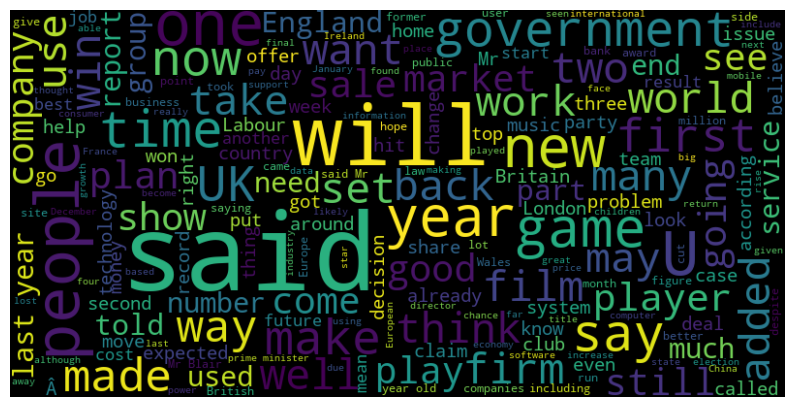

In [695]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 400, random_state=21, max_font_size=110).generate(' '.join(df['Text']))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Compering between thw two models

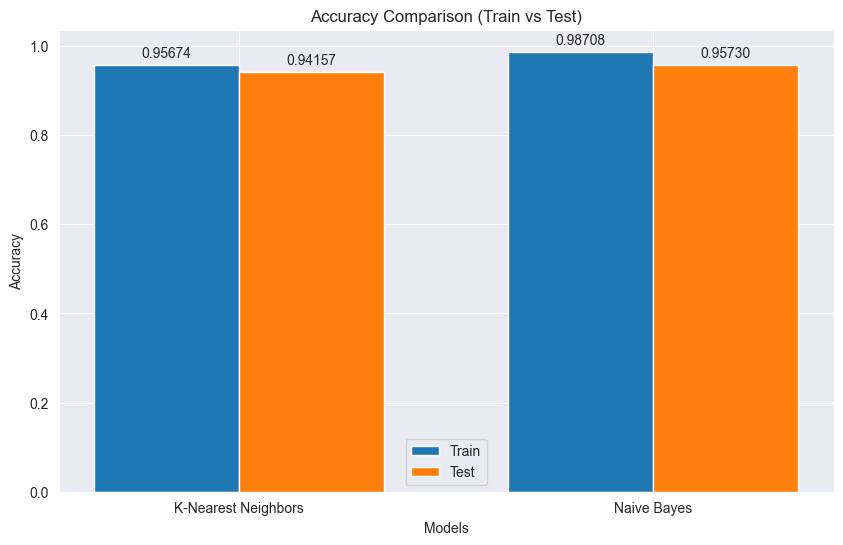

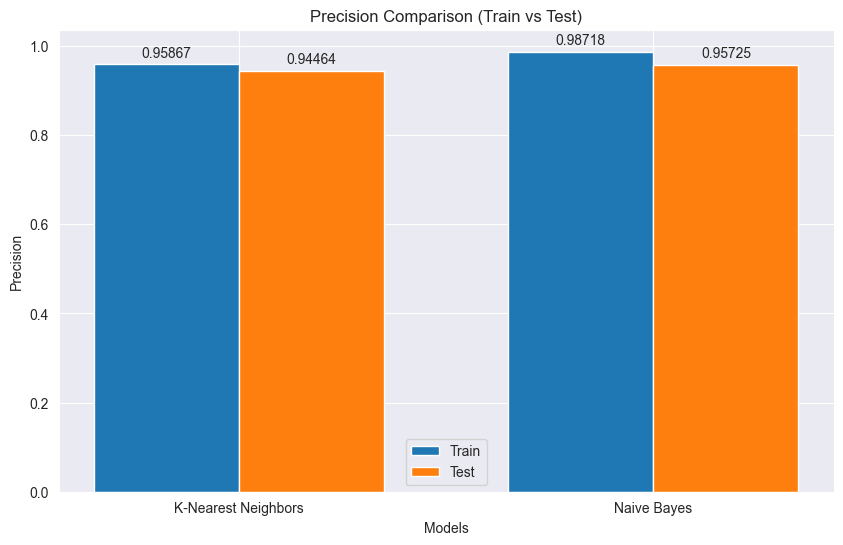

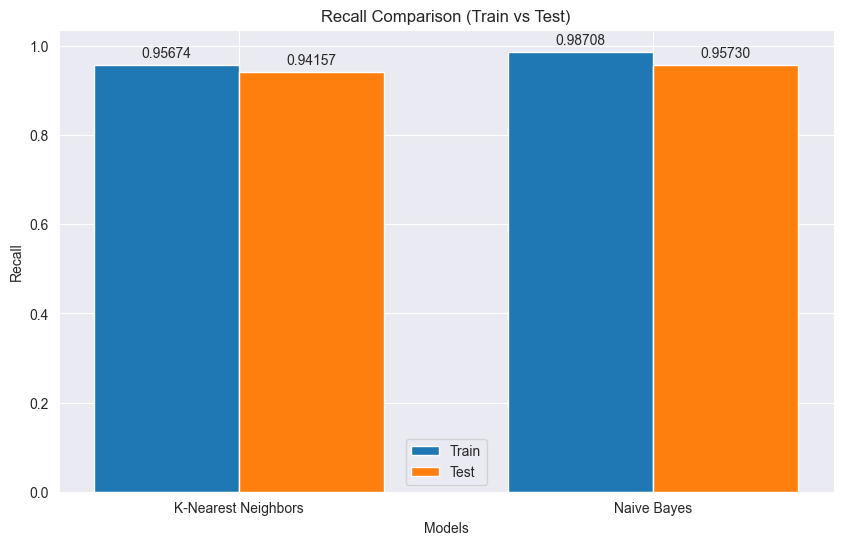

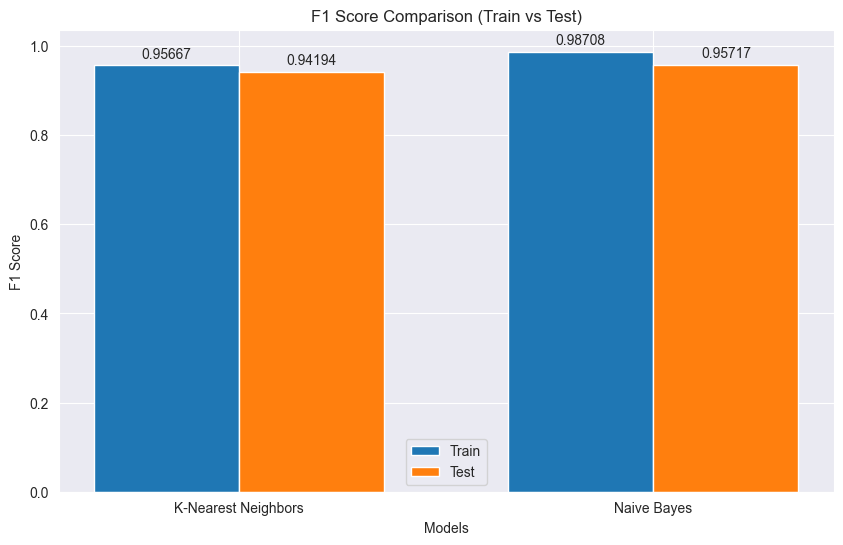

In [696]:
def plot_comparison(train_scores, test_scores, model_names):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    
    for i, metric in enumerate(metrics):
        plt.figure(figsize=(10, 6))
        bar_width = 0.35
        indices = np.arange(len(model_names))

        plt.bar(indices - bar_width/2, train_scores[:, i], bar_width, label='Train')
        plt.bar(indices + bar_width/2, test_scores[:, i], bar_width, label='Test')
        
        for j, (train_val, test_val) in enumerate(zip(train_scores[:, i], test_scores[:, i])):
            plt.text(indices[j] - bar_width/2, train_val + 0.01, f'{train_val:.5f}', ha='center', va='bottom')
            plt.text(indices[j] + bar_width/2, test_val + 0.01, f'{test_val:.5f}', ha='center', va='bottom')

        plt.xlabel('Models')
        plt.ylabel(metric)
        plt.title(f'{metric} Comparison (Train vs Test)')
        plt.xticks(indices, model_names)
        plt.legend()
        plt.show()
        
        
model_names = ['K-Nearest Neighbors', 'Naive Bayes']

# Plotting the comparison
accuracy_scores = [accuracy, accuracy2]
precision_scores = [precision, precision2]
recall_scores = [recall, recall2]
f1_scores = [f1, f1_2]

train_metrics_knn = np.array([accuracy0, precision0, recall0, f1_0])    
test_metrics_knn = np.array([accuracy, precision, recall, f1])


train_metrics_nb = np.array([accuracy1, precision1, recall1, f1_1])
test_metrics_nb = np.array([accuracy2, precision2, recall2, f1_2])


# Plotting the comparison for both train and test
train_scores = np.vstack((train_metrics_knn, train_metrics_nb))
test_scores = np.vstack((test_metrics_knn, test_metrics_nb))

plot_comparison(train_scores, test_scores, model_names)